# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API url and parameters

units = "imperial"
baseurl = "http://api.openweathermap.org/data/2.5/weather?"
search_url = f"{baseurl}appid={weather_api_key}&units={units}&q="

# Placeholder for variables

name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
count = 0
# Find correspondent weather info based on location

for city in cities:
    count += 1
    try:
        response = requests.get(search_url+city).json()
        print(f"Processing Record {count} | {city}")
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
               
    except KeyError:
        print("City not found. Skipping...")
        pass



Beginning Data Retrieval
Processing Record 1 | manggar
Processing Record 2 | hithadhoo
Processing Record 3 | mahebourg
Processing Record 4 | rikitea
Processing Record 5 | mozarlandia
Processing Record 6 | eyl
Processing Record 7 | grand river south east
City not found. Skipping...
Processing Record 8 | cape town
Processing Record 9 | vaini
Processing Record 10 | butaritari
Processing Record 11 | dekoa
City not found. Skipping...
Processing Record 12 | jamestown
Processing Record 13 | tuatapere
Processing Record 14 | kaitangata
Processing Record 15 | shingu
Processing Record 16 | puerto ayora
Processing Record 17 | klyuchi
Processing Record 18 | constitucion
Processing Record 19 | hermanus
Processing Record 20 | bagotville
Processing Record 21 | punta arenas
Processing Record 22 | bonney lake
Processing Record 23 | mataura
Processing Record 24 | thompson
Processing Record 25 | new norfolk
Processing Record 26 | busselton
Processing Record 27 | shuangyang
Processing Record 28 | souillac


Processing Record 234 | athabasca
Processing Record 235 | cherskiy
Processing Record 236 | trincomalee
Processing Record 237 | luderitz
Processing Record 238 | farafangana
Processing Record 239 | amapa
Processing Record 240 | port blair
Processing Record 241 | indianola
Processing Record 242 | havoysund
Processing Record 243 | garden city
Processing Record 244 | tomatlan
Processing Record 245 | ortakoy
Processing Record 246 | zhangye
Processing Record 247 | tailai
Processing Record 248 | nioki
Processing Record 249 | kismayo
Processing Record 250 | ribeira grande
Processing Record 251 | kaman
Processing Record 252 | san patricio
Processing Record 253 | oromocto
Processing Record 254 | khatanga
Processing Record 255 | ulladulla
Processing Record 256 | namatanai
Processing Record 257 | kerki
City not found. Skipping...
Processing Record 258 | mago
Processing Record 259 | quesnel
Processing Record 260 | tawkar
City not found. Skipping...
Processing Record 261 | tadine
Processing Record 26

Processing Record 462 | druzhba
Processing Record 463 | las margaritas
Processing Record 464 | ust-ordynskiy
Processing Record 465 | hasaki
Processing Record 466 | grenville
Processing Record 467 | bargal
City not found. Skipping...
Processing Record 468 | arman
Processing Record 469 | pulawy
Processing Record 470 | liverpool
Processing Record 471 | benguela
Processing Record 472 | popondetta
Processing Record 473 | xiuyan
Processing Record 474 | brae
Processing Record 475 | takhtamygda
Processing Record 476 | ruatoria
City not found. Skipping...
Processing Record 477 | salinopolis
Processing Record 478 | barranca
Processing Record 479 | ixtapa
Processing Record 480 | wakkanai
Processing Record 481 | santa branca
Processing Record 482 | leningradskiy
Processing Record 483 | nelson bay
Processing Record 484 | nairn
Processing Record 485 | touros
Processing Record 486 | pimentel
Processing Record 487 | inzer
Processing Record 488 | trapani
Processing Record 489 | kintampo
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Write findings to dataframe

data_df = pd.DataFrame({
    "City":name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date":date   
                       })

data_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manggar,-2.88,108.27,81.88,83,97,15.50,ID,1593570000
1,Hithadhoo,-0.60,73.08,83.86,65,99,2.89,MV,1593570000
2,Mahébourg,-20.41,57.70,62.60,93,40,4.70,MU,1593570000
3,Rikitea,-23.12,-134.97,69.33,62,48,17.07,PF,1593570000
4,Mozarlândia,-14.74,-50.57,70.18,56,9,2.33,BR,1593570001
...,...,...,...,...,...,...,...,...,...
551,Kununurra,-15.77,128.73,84.20,20,9,12.75,AU,1593570049
552,Maceió,-9.67,-35.74,71.60,94,40,2.24,BR,1593570049
553,Itacaré,-14.28,-39.00,73.00,82,50,4.81,BR,1593570049
554,Charleston,32.78,-79.93,75.20,88,75,14.99,US,1593569840


In [5]:
# Save Data to csv
data_df.to_csv("../output_data/City_Weather.csv")
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manggar,-2.88,108.27,81.88,83,97,15.50,ID,1593570000
1,Hithadhoo,-0.60,73.08,83.86,65,99,2.89,MV,1593570000
2,Mahébourg,-20.41,57.70,62.60,93,40,4.70,MU,1593570000
3,Rikitea,-23.12,-134.97,69.33,62,48,17.07,PF,1593570000
4,Mozarlândia,-14.74,-50.57,70.18,56,9,2.33,BR,1593570001
...,...,...,...,...,...,...,...,...,...
551,Kununurra,-15.77,128.73,84.20,20,9,12.75,AU,1593570049
552,Maceió,-9.67,-35.74,71.60,94,40,2.24,BR,1593570049
553,Itacaré,-14.28,-39.00,73.00,82,50,4.81,BR,1593570049
554,Charleston,32.78,-79.93,75.20,88,75,14.99,US,1593569840


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use describe to find the max of the KPIs

data_describe = data_df.describe()
data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.510953,14.757320,68.059982,71.093525,48.447842,7.938777,1.593570e+09
std,33.360002,91.733547,13.621570,20.943387,39.771543,5.584432,7.246299e+01
min,-54.800000,-175.200000,24.800000,9.000000,0.000000,0.220000,1.593570e+09
25%,-8.432500,-67.175000,59.000000,59.750000,1.000000,3.525000,1.593570e+09
50%,25.545000,17.700000,69.240000,76.000000,40.500000,6.865000,1.593570e+09
75%,47.810000,102.327500,78.800000,88.000000,90.000000,10.702500,1.593570e+09
max,78.220000,178.420000,98.600000,100.000000,100.000000,30.800000,1.593570e+09


In [7]:
#  Delete Get the indices of cities that have humidity over 100%.
data_df.dtypes

index = data_df[data_df['Humidity']>=100].index
index



Int64Index([100, 109, 142, 177, 184, 261, 293, 311, 321, 403, 527, 533, 550], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Delete these row indexes from dataFrame

clean_city_data = data_df.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manggar,-2.88,108.27,81.88,83,97,15.50,ID,1593570000
1,Hithadhoo,-0.60,73.08,83.86,65,99,2.89,MV,1593570000
2,Mahébourg,-20.41,57.70,62.60,93,40,4.70,MU,1593570000
3,Rikitea,-23.12,-134.97,69.33,62,48,17.07,PF,1593570000
4,Mozarlândia,-14.74,-50.57,70.18,56,9,2.33,BR,1593570001
...,...,...,...,...,...,...,...,...,...
551,Kununurra,-15.77,128.73,84.20,20,9,12.75,AU,1593570049
552,Maceió,-9.67,-35.74,71.60,94,40,2.24,BR,1593570049
553,Itacaré,-14.28,-39.00,73.00,82,50,4.81,BR,1593570049
554,Charleston,32.78,-79.93,75.20,88,75,14.99,US,1593569840


In [9]:
# Extract relevant fields from the data frame
clean_city_data_df = clean_city_data[['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country']]
clean_city_data_df

# Export the City_Data into a csv

clean_city_data_df.to_csv("../output_data/Clean_City_Data.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

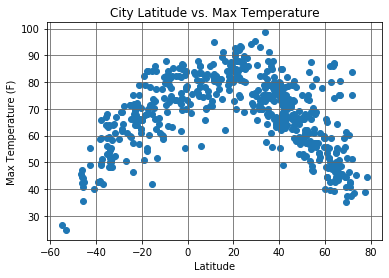

In [10]:
lat = clean_city_data_df['Lat']
temp = clean_city_data_df['Max Temp']
# print(temp)

plt.scatter(lat,temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.savefig("../output_data/Lat_vs_Temp.png")
plt.show()



## Latitude vs. Humidity Plot

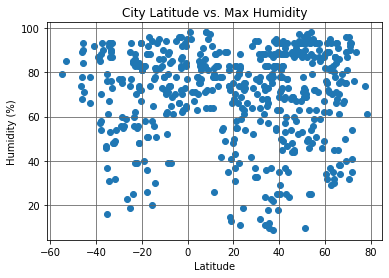

In [11]:
lat = clean_city_data_df['Lat']
humidity = clean_city_data_df['Humidity']
# print(temp)

plt.scatter(lat,humidity)
plt.title('City Latitude vs. Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.savefig("../output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

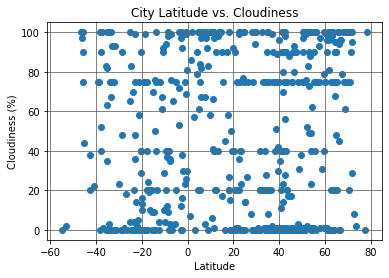

In [12]:
lat = clean_city_data_df['Lat']
cloudiness = clean_city_data_df['Cloudiness']
# print(temp)

plt.scatter(lat,cloudiness)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.savefig("../output_data/Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

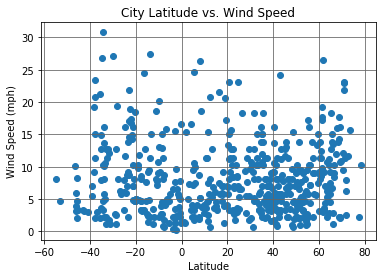

In [13]:
lat = clean_city_data_df['Lat']
wind_speed = clean_city_data_df['Wind Speed']
# print(wind_speed)

plt.scatter(lat,wind_speed)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.savefig("../output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots



In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern = clean_city_data_df.loc[(clean_city_data_df['Lat']>0)]
northern


southern = clean_city_data_df.loc[(clean_city_data_df['Lat']<0)]
southern


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Manggar,-2.88,108.27,81.88,83,97,15.50,ID
1,Hithadhoo,-0.60,73.08,83.86,65,99,2.89,MV
2,Mahébourg,-20.41,57.70,62.60,93,40,4.70,MU
3,Rikitea,-23.12,-134.97,69.33,62,48,17.07,PF
4,Mozarlândia,-14.74,-50.57,70.18,56,9,2.33,BR
...,...,...,...,...,...,...,...,...
541,Dubbo,-32.25,148.62,64.40,48,75,12.75,AU
544,Le Port,-20.94,55.29,66.20,72,0,8.05,RE
551,Kununurra,-15.77,128.73,84.20,20,9,12.75,AU
552,Maceió,-9.67,-35.74,71.60,94,40,2.24,BR


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.7
The r-squared is: 0.4893809680768822


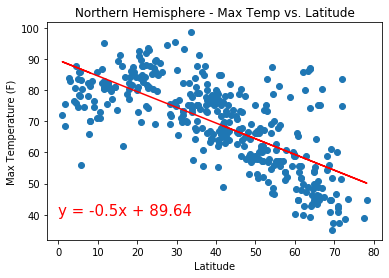

In [16]:
# get northern Max Temp and Latitude

northern_temp = northern['Max Temp']
northern_lat = northern['Lat']

# Calculate correlation
correlation = st.pearsonr(northern_lat, northern_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph
plt.scatter(northern_lat, northern_temp)
plt.plot(northern_lat,regress_values,"r")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Nothern_Max_Temp_Lat.png")
plt.show()

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.78
The r-squared is: 0.6006899751783513


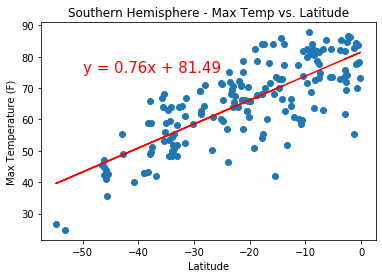

In [17]:
# get Southern Max Temp and Latitude

southern_temp = southern['Max Temp']
southern_lat = southern['Lat']

# Calculate the correlation
correlation = st.pearsonr(southern_lat, southern_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph
plt.scatter(southern_lat, southern_temp)
plt.plot(southern_lat,regress_values,"r")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Sourthern_Max_Temp_Lat.png")
plt.show()

In terms of Max Temperature, it's observed that Northern is hemisphere is negative correlated, while Southern hemisfere is positive correlated

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0
The r-squared is: 4.639163822806214e-07


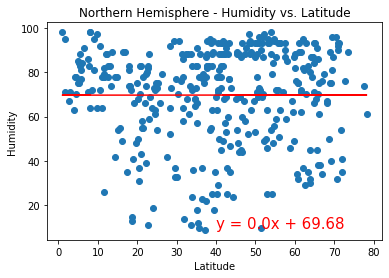

In [18]:
# get Northern Humidity and Latitude

northern_hum = northern['Humidity']
northern_lat = northern['Lat']

# Calculate the correlation

correlation = st.pearsonr(northern_lat, northern_hum)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_hum)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(northern_lat, northern_hum)
plt.plot(northern_lat,regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Nothern_Humidity_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06
The r-squared is: 0.0039306418305604185


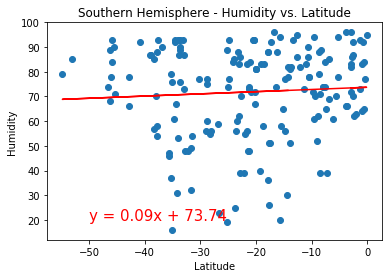

In [19]:
# get Southern Humidity and Latitude

southern_hum = southern['Humidity']
southern_lat = southern['Lat']

# Calculate the correlation
correlation = st.pearsonr(southern_lat, southern_hum)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_hum)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(southern_lat, southern_hum)
plt.plot(southern_lat,regress_values,"r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern_Humidity_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09
The r-squared is: 0.0076086630227450444


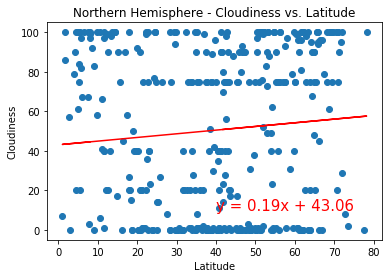

In [20]:
# get Northern Cloudiness and Latitude

northern_cloud = northern['Cloudiness']
northern_lat = northern['Lat']

# Calculate the correlation

correlation = st.pearsonr(northern_lat, northern_cloud)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloud)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(northern_lat, northern_cloud)
plt.plot(northern_lat,regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Nothern_Cloud_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.01
The r-squared is: 3.386112066476893e-05


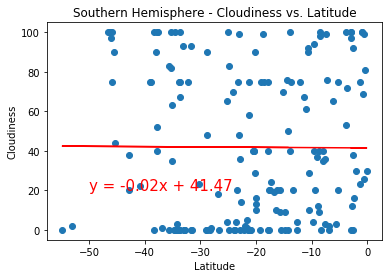

In [21]:
# get Southern Cloudiness and Latitude

southern_cloud = southern['Cloudiness']
southern_lat = southern['Lat']

# Calculate the correlation

correlation = st.pearsonr(southern_lat, southern_cloud)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloud)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(southern_lat, southern_cloud)
plt.plot(southern_lat,regress_values,"r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern_Cloud_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.08
The r-squared is: 0.007098578557341802


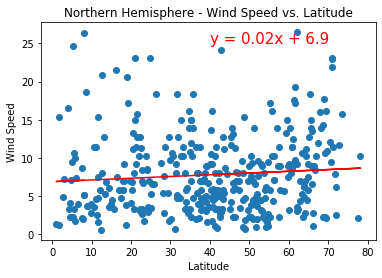

In [22]:
# get Northern Wind Speed and Latitude

northern_wind = northern['Wind Speed']
northern_lat = northern['Lat']

# Calculate the correlation

correlation = st.pearsonr(northern_lat, northern_wind)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(northern_lat, northern_wind)
plt.plot(northern_lat,regress_values,"r")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Nothern_Wind_Lat.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.15
The r-squared is: 0.023633187729765068


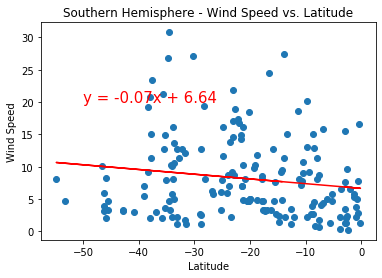

In [23]:
# get Southern Wind Speed and Latitude

southern_wind = southern['Wind Speed']
southern_lat = southern['Lat']

# Calculate the correlation

correlation = st.pearsonr(southern_lat, southern_wind)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

# Plot the graph

plt.scatter(southern_lat, southern_wind)
plt.plot(southern_lat,regress_values,"r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern_Wind_Lat.png")
plt.show()